# 1. Logistic regression

## Problem 1

Consider the average empirical loss (the risk) for logistic regression:

$$
J(\theta)=\frac{1}{m} \sum_{i=1}^m \log(1 + e^{-y^{(i)}\theta^T x^{(i)}}) = - \frac{1}{m} log(h_\theta (y^{(i)} x^{(i)}))\tag{1}
$$

Where $y^{(i)}  \in \{-1,1\}, h_\theta(x)=g(\theta^Tx)$ and $g(z) = 1/(1+e^{-z})$. Find the Hessian H of this function, and show that for any vector z, it holds true that

$$
z^THz \ge 0 \tag{2}
$$

### My Solution

We know that the Hessain matrix is the second order partial derivative of the function $J(\theta)$. Therefore the first order partial derivative: the gradient matrix should be computed firstly.

The offical gradient of a matrix function is defined as below:

$$
\nabla f(x)= \begin{bmatrix}
    \frac{\partial}{\partial x_1}f(x)\\
    \vdots \\
    \frac{\partial}{\partial x_n}f(x)\\
\end{bmatrix} \tag{3}
$$

where

$$
x = \begin{bmatrix}
    x_1 \\
    \vdots \\
    x_n \\
\end{bmatrix}
$$

So We computed the first order partial derivative $J(\theta)$ against $\theta_j$

$$
\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m} \sum_{i=1}^m \frac{e^{-y^{(i)}\theta^T x^{(i)}}}{1 + e^{-y^{(i)}\theta^T x^{(i)}}} (-y^{(i)}x^{(i)}_k) \tag{4}
$$

And we also know that:

$$
g(-y^{(i)}\theta^T x^{(i)})=sigmoid(-y^{(i)}\theta^T x^{(i)}) = h_\theta(-y^{(i)} x^{(i)}) \tag{5}
$$

$$
\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m} \sum_{i=1}^m h_\theta(-y^{(i)} x^{(i)}) (-y^{(i)} x^{(i)}_j) \tag{6}
$$

So the gradient of $J(\theta)$

$$
\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m h_\theta(-y^{(i)} x^{(i)}) (-y^{(i)} x^{(i)}) \tag{7}
$$

## Problem 2

We have provided two data files:
- logistic_x.txt
- logistic_y.txt

These files contain the inputs $(x^{(i)} \in R^2)$ and outputs $(y(i) \in \{−1, 1\})$, respectively for a binary classification problem, with one training example per row. Implement Newton’s method for optimizing $J(\theta)$, and apply it to fit a logistic regression model to the data. Initialize Newton’s method with $\theta = 0$ (the vector of all zeros). What are the coefficients $\theta$ resulting from your fit? (Remember to include the intercept term.)

### My Solution 

Let's load the dataset firstly:

In [1]:
import numpy as np
from mohism_utils import sigmoid
import matplotlib.pyplot as plt

def load_dataset():
    train_X = np.loadtxt('logistic_x.txt')
    train_Y = np.loadtxt('logistic_y.txt')
    train_Y = train_Y.reshape(1, -1)
    return train_X.T, train_Y

In [2]:
train_X, train_Y = load_dataset()
print("train_X:Size:" + str(train_X.shape))
print("train_Y:Size:" + str(train_Y.shape))

train_X:Size:(2, 99)
train_Y:Size:(1, 99)


In [3]:
def initialize_with_zeros(dim):
    theta = np.zeros((dim, 1))
    b = 0
    return theta, b

In [4]:
def compute_gradient(X, Y, w, b):
    """
    Arguments:
    X -- data of size (2, number of examples)
    Y -- true "label" vector (containing -1 or 1) of size (1, number of examples) 
    w -- weights, a numpy array of size (2, 1)
    b -- scalor, bias
    """
    m = Y.shape[1]
    X = np.row_stack((X, np.ones((1, m))))
    theta = np.row_stack((w, b))
    Y_computed = np.dot(theta.T, X)
    Z = sigmoid(- Y * Y_computed)
    Y_m_X = - Y * X
    ret = np.dot(Z, Y_m_X.T)
    return ret/m

In [5]:
X = np.array([[1.,2.,-1.],[3.,4.,-3.2]])
Y = np.array([[1,-1,1]])
w, b = np.array([[1.],[2.]]), 2.

print("w size=" + str(w.shape))
print("X size=" + str(X.shape))
print("Y size=" + str(Y.shape))

gradient = compute_gradient(X, Y, w, b)
print("Gradient=" + str(gradient))

w size=(2, 1)
X size=(2, 3)
Y size=(1, 3)
Gradient=[[  9.98456015e-01   2.39507239e+00   1.45557814e-03]]


In [6]:
def compute_hessian(X, w, b):
    """
    Arguments:
    X -- data of size (2, number of examples)
    w -- weights, a numpy array of size (2, 1)
    b -- scalor, bias
    """
    m = X.shape[1]
    X = np.row_stack((X, np.ones((1, m))))
    theta = np.row_stack((w, b))
    sm =  sigmoid(np.dot(theta.T, X))
    derivative_sm = sm * (1 - sm)
    diag_d_sm = np.diag(derivative_sm.flatten())
    hessian = np.dot(X, diag_d_sm)
    hessian = np.dot(hessian, X.T)
    return hessian / m

In [7]:
X = np.array([[1.,2.,-1.],[3.,4.,-3.2]])
Y = np.array([[1,-1,1]])
w, b = np.array([[1.],[2.]]), 2.

print("w size=" + str(w.shape))
print("X size=" + str(X.shape))
print("Y size=" + str(Y.shape))

gradient = compute_gradient(X, Y, w, b)
print("Gradient=" + str(gradient))
hessian = compute_hessian(X, w, b)
print("Hessian=" + str(hessian))

w size=(2, 1)
X size=(2, 3)
Y size=(1, 3)
Gradient=[[  9.98456015e-01   2.39507239e+00   1.45557814e-03]]
Hessian=[[ 0.00154134  0.00491422 -0.0014468 ]
 [ 0.00491422  0.01568118 -0.00464289]
 [-0.0014468  -0.00464289  0.00153519]]


In [8]:
def logistic_regression(X, Y):
    """
    Arguments:
    X -- data of size (2, number of examples)
    Y -- true "label" vector (containing -1 or 1) of size (1, number of examples) 
    """
    dim = X.shape[0]
    w, b = initialize_with_zeros(dim)
    theta = np.row_stack((w, b))

    while True:
        gradient = compute_gradient(X, Y, theta[0:2], theta[2])
        hessian = compute_hessian(X, theta[0:2], theta[2])

        if np.less(np.fabs(gradient), np.array([0.0001, 0.0001, 0.0001])).all():
            break
        theta = theta - np.dot(np.linalg.inv(hessian), gradient.T)
        
    return theta[0:2], theta[2]

In [9]:
w, b = logistic_regression(train_X, train_Y)
print("final:w=" + str(w))
print("final:b=" + str(b))

final:w=[[ 0.76037096]
 [ 1.17194549]]
final:b=[-2.62050954]


x_min=-0.42920059
x_max=8.7054006


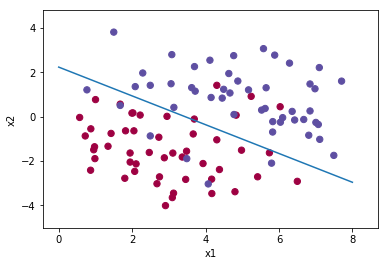

In [10]:
h = 0.02
x_min, x_max = train_X[0, :].min() - 1, train_X[0, :].max() + 1
y_min, y_max = train_X[1, :].min() - 1, train_X[1, :].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure()
plt.scatter(train_X[0, :], train_X[1, :], c=train_Y[0,:], s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.ylabel('x2')
plt.xlabel('x1')

print("x_min=" + str(x_min))
print("x_max=" + str(x_max))

# Draw classifier line
x1 = 0
y1 = - (w[0] * x1 + b) / w[1]
x2 = 8
y2 = - (w[0] * x2 + b) / w[1]

plt.plot([x1, x2], [y1, y2])
plt.show()